In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [52]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


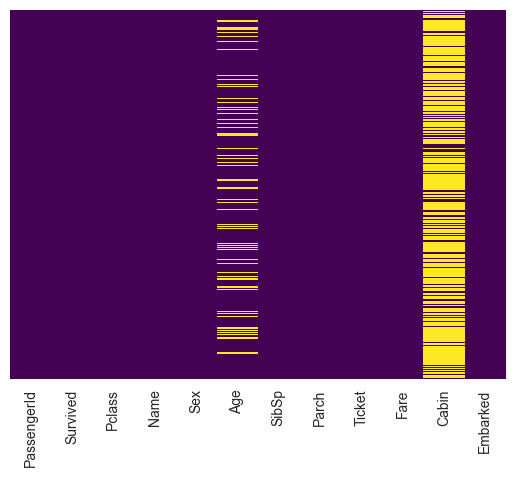

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('heatmap.png')

In [55]:
sns.set_style('whitegrid')


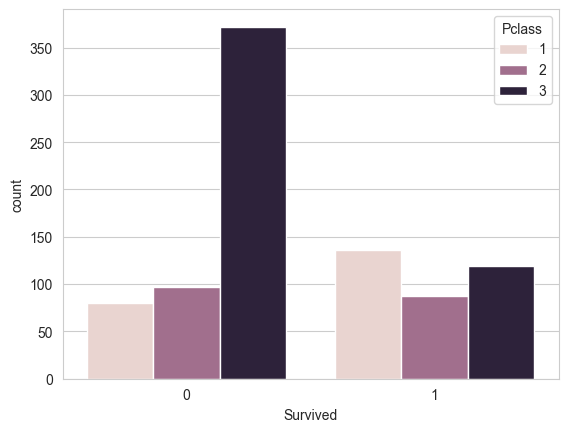

In [56]:
sns.countplot(x='Survived', data=train,hue='Pclass')
plt.savefig('countplot.png')

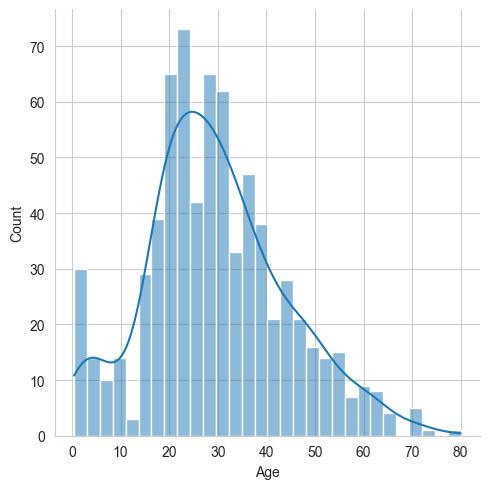

In [57]:
sns.displot(train['Age'].dropna(), kde=True, bins=30)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_11378/3488424762.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




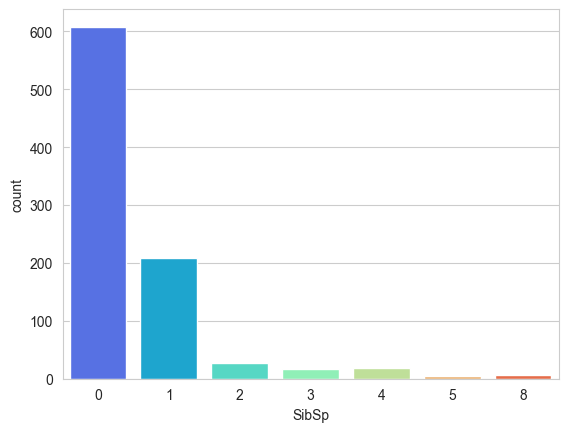

In [59]:
sns.countplot(x='SibSp', data=train,palette='rainbow')
plt.savefig('countplot2.png')

In [60]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=30, color='green')

/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_11378/3437296160.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




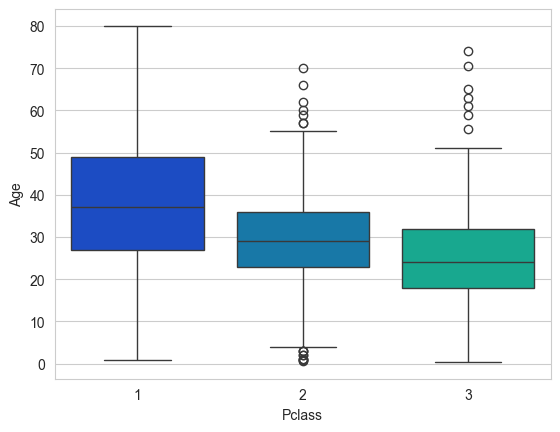

In [61]:
plt.Figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
plt.savefig('boxplot.png')

In [62]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_11378/943367216.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_11378/943367216.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



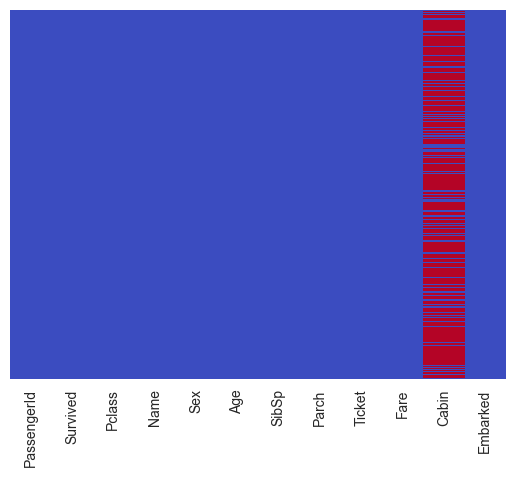

In [63]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.savefig('heatmap2.png')

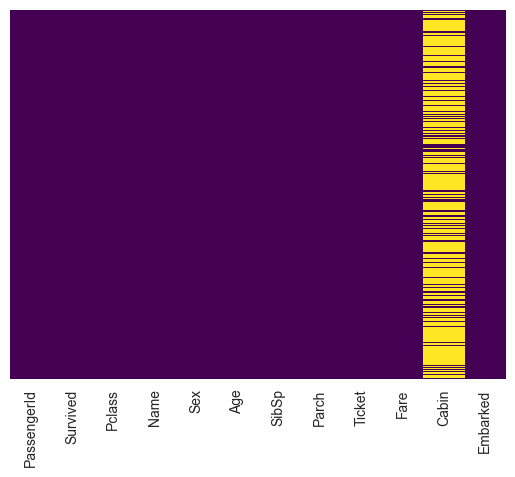

In [64]:
# c.drop('Cabin', axis=1, inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('heatmap3.png')

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [76]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [77]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [78]:
train = pd.concat([train,sex,embark], axis=1)

In [79]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False,False


In [83]:
train.drop(['Cabin'], axis=1, inplace=True)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True,True,False,True


In [85]:
train.drop('PassengerId', axis=1, inplace=True)

In [86]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True,True,False,True
